In [1]:
import numpy  as np
import  matplotlib.pyplot as plt
import pandas as pd
import  seaborn as sns

In [2]:
df=pd.read_csv('wine_data.data',header=None,usecols=[0,1,2])
df.columns=['Class Label','Alcohol','Malic acid']
df

,Class Label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

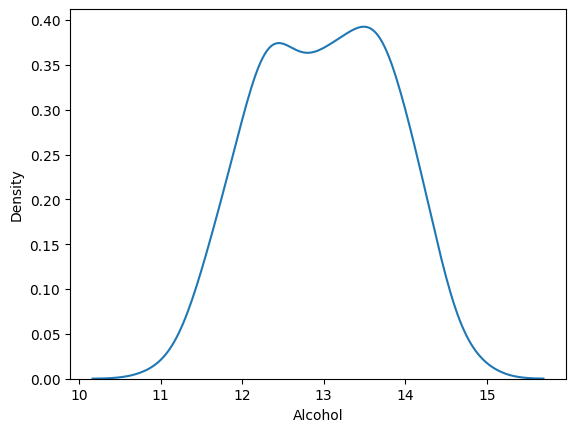

In [3]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

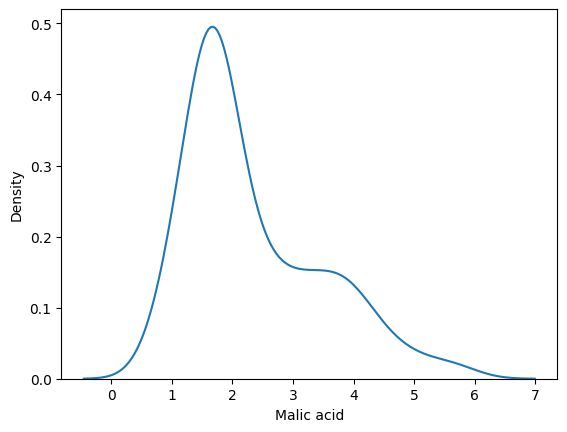

In [4]:
sns.kdeplot(df['Malic acid'])


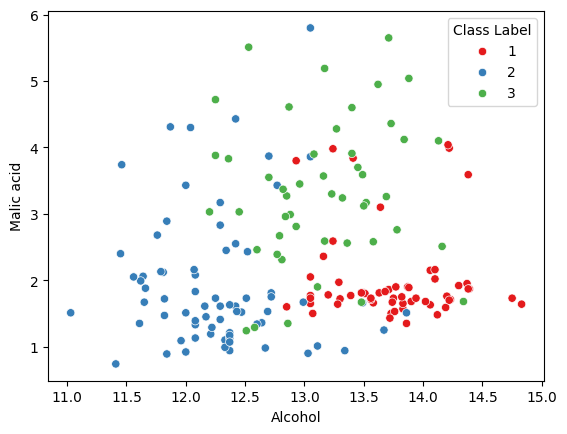

In [5]:
sns.scatterplot(x='Alcohol',y='Malic acid',data=df,hue='Class Label',palette='Set1')
set1={1:'r',2:'g',3:'b'}

In [7]:
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df[['Alcohol','Malic acid']],df['Class Label'],
                                               test_size=0.3,
                                               random_state=42,stratify=df['Class Label'])
X_train.shape,X_test.shape

((124, 2), (54, 2))

MinMaxScaler technique  of Feature Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# fit the scaler to the training data
scaler.fit(X_train)

# transform the training and test data
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [12]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.3
std,0.8,1.1
min,11.0,0.7
25%,12.4,1.6
50%,13.0,1.8
75%,13.6,3.0
max,14.8,5.8


In [14]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

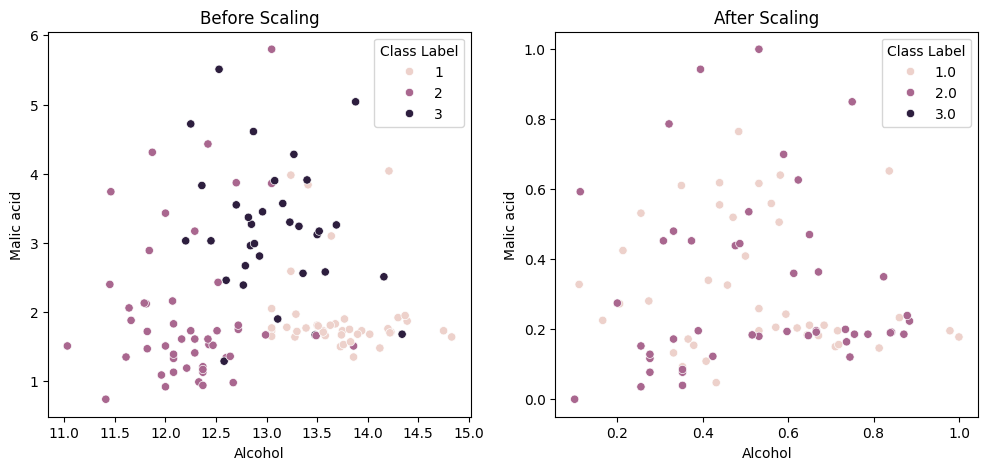

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
sns.scatterplot(x=X_train['Alcohol'],y=X_train['Malic acid'],hue=y_train,ax=ax1)
ax1.set_title('Before Scaling')

sns.scatterplot(x=X_train_scaled['Alcohol'],y=X_train_scaled['Malic acid'],hue=y_train,ax=ax2)
ax2.set_title('After Scaling')



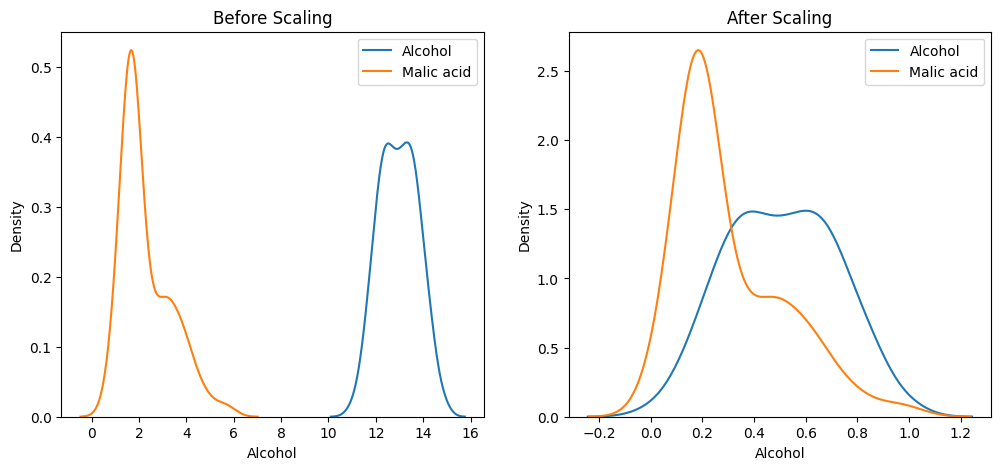

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

#  befor  scaling  
ax1.set_title("Before Scaling")
sns.kdeplot(x=X_train['Alcohol'], ax=ax1, label='Alcohol')
sns.kdeplot(x=X_train['Malic acid'], ax=ax1, label='Malic acid')
ax1.legend()

#  after scaling  
ax2.set_title("After Scaling")
sns.kdeplot(x=X_train_scaled['Alcohol'], ax=ax2, label='Alcohol')
sns.kdeplot(x=X_train_scaled['Malic acid'], ax=ax2, label='Malic acid')
ax2.legend()

plt.show()


MaxAbsolute Scaling  technique  of Feature Scaling

In [31]:
from  sklearn.preprocessing import MaxAbsScaler
Scaler_Max=MaxAbsScaler()
Scaler_Max.fit(X_train)


,copy,True


In [33]:
X_train_MaxSal=Scaler_Max.transform(X_train)
X_test_MaxSal=Scaler_Max.transform(X_test)

In [34]:
X_train_MaxSal=pd.DataFrame(X_train_MaxSal,columns=X_train.columns)
X_test_MaxSal=pd.DataFrame(X_test_MaxSal,columns=X_test.columns)

In [42]:
# MinMax Scaler  descripton
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.3,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [37]:
#  Macimum Absolute Scaling  description
np.round(X_train_MaxSal.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.9,0.4
std,0.1,0.2
min,0.7,0.1
25%,0.8,0.3
50%,0.9,0.3
75%,0.9,0.5
max,1.0,1.0


Robust  Scaling  technique  of feature  scaling 

In [43]:
from  sklearn.preprocessing import RobustScaler
Scaler_Robust=RobustScaler()
Scaler_Robust.fit(X_train)

,with_centering,True
,with_scaling,True
,quantile_range,"(25.0, ...)"
,copy,True
,unit_variance,False


In [45]:
X_train_RobScale=Scaler_Robust.transform(X_train)
X_test_RobScale=Scaler_Robust.transform(X_test)

In [46]:
X_train_RobScale=pd.DataFrame(X_train_RobScale,columns=X_train.columns)
X_test_RobScale=pd.DataFrame(X_test_RobScale,columns=X_test.columns)

In [47]:
np.round(X_train_RobScale.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,-0.0,0.3
std,0.7,0.7
min,-1.6,-0.8
25%,-0.5,-0.1
50%,-0.0,-0.0
75%,0.5,0.9
max,1.5,2.8
